# Lab 1 Analysis Example using Thicket

In [175]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [176]:
tk = th.Thicket.from_caliperreader(glob("*Random.cali"))

(2/2) Creating Thicket: 100%|██████████| 62/62 [00:01<00:00, 36.09it/s]


In [177]:
# Performance data
tk.dataframe

nid  \
node                                              profile            
{'name': 'main', 'type': 'function'}              9559365      1.0   
                                                  52934445     1.0   
                                                  119067174    1.0   
                                                  184798495    1.0   
                                                  190787875    1.0   
                                                  353228518    1.0   
                                                  364706545    1.0   
                                                  474772590    1.0   
                                                  674061022    1.0   
                                                  729000645    1.0   
                                                  759755015    1.0   
                                                  788575561    1.0   
                                                  799423362    1.0   
                                                  1006588117   1.0   
                                                  1089219529   1.0   
                                                  1280800328   1.0   
                                                  1397912178   1.0   
                                                  1444626107   1.0   
                                                  1463283845   1.0   
                                                  1491766988   1.0   
                                                  1604499909   1.0   
                                                  1647932524   1.0   
                                                  1729738504   1.0   
                                                  1773611422   1.0   
                                                  1834508046   1.0   
                                                  1951796305   1.0   
                                                  1990260383   1.0   
                                                  2082040663   1.0   
                                                  2126846621   1.0   
                                                  2178388479   1.0   
                                                  2211495802   1.0   
                                                  2280455300   1.0   
                                                  2283135045   1.0   
                                                  2321182096   1.0   
                                                  2398729215   1.0   
                                                  2468903913   1.0   
                                                  2494126949   1.0   
                                                  2581850615   1.0   
                                                  2731768169   1.0   
                                                  2752669290   1.0   
                                                  2776990634   1.0   
                                                  2851417236   1.0   
                                                  2870154355   1.0   
                                                  2895551757   1.0   
                                                  2915213779   1.0   
                                                  3042401969   1.0   
                                                  3087598449   1.0   
                                                  3101028973   1.0   
                                                  3186620827   1.0   
                                                  3336655962   1.0   
                                                  3352213396   1.0   
                                                  3389615994   1.0   
                                                  3483717948   1.0   
                                                  3488420799   1.0   
                                                  3521608253   1.0   
                                                  3575461481   1.0   
   

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [178]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
9559365                  2.11.0              32   
52934445                 2.11.0             128   
119067174                2.11.0             512   
184798495                2.11.0             128   
190787875                2.11.0               4   
353228518                2.11.0              32   
364706545                2.11.0             512   
474772590                2.11.0             512   
674061022                2.11.0              64   
729000645                2.11.0             128   
759755015                2.11.0              32   
788575561                2.11.0               4   
799423362                2.11.0              16   
1006588117               2.11.0               8   
1089219529               2.11.0              16   
1280800328               2.11.0             512   
1397912178               2.11.0              32   
1444626107               2.11.0              32   
1463283845               2.11.0              16   
1491766988               2.11.0               4   
1604499909               2.11.0             128   
1647932524               2.11.0             512   
1729738504               2.11.0               8   
1773611422               2.11.0               4   
1834508046               2.11.0             256   
1951796305               2.11.0               2   
1990260383               2.11.0              64   
2082040663               2.11.0              64   
2126846621               2.11.0              16   
2178388479               2.11.0               2   
2211495802               2.11.0               8   
2280455300               2.11.0               4   
2283135045               2.11.0               8   
2321182096               2.11.0             512   
2398729215               2.11.0             128   
2468903913               2.11.0             256   
2494126949               2.11.0               8   
2581850615               2.11.0               2   
2731768169               2.11.0              16   
2752669290               2.11.0             256   
2776990634               2.11.0               8   
2851417236               2.11.0              32   
2870154355               2.11.0             256   
2895551757               2.11.0              64   
2915213779               2.11.0             512   
3042401969               2.11.0             256   
3087598449               2.11.0              32   
3101028973               2.11.0               8   
3186620827               2.11.0              64   
3336655962               2.11.0              64   
3352213396               2.11.0               2   
3389615994               2.11.0               2   
3483717948               2.11.0               2   
3488420799               2.11.0              16   
3521608253               2.11.0             256   
3575461481               2.11.0               4   
3685824009               2.11.0               2   
3840311578               2.11.0             128   
4015252677               2.11.0              64   
4179267569               2.11.0             256   
4180543436               2.11.0               4   
4234497165               2.11.0              16   
4280050993               2.11.0             128   

                                                 spot.metrics  \
profile                                                         
9559365     min#inclusive#sum#time.duration,max#inclusive#...   
52934445    min#inclusive#sum#time.duration,max#inclusive#...   
119067174   min#inclusive#sum#time.duration,max#inclusive#...   
184798495   min#inclusive#sum#time.duration,max#inclusive#...   
190787875   min#inclusive#sum#time.duration,max#inclusive#...   
353228518   min#inclusive#sum#time.duration,max#inclusive#...   
364706545   min#inclusive#sum#time.duration,max#inclusive#...   
474772590   min#inclusive#sum#time.duration,max#inclusive#...   
674061022   min#inclusive#sum#time.duration,m

In [179]:
byInput = tk.groupby("input_size")
#switch to InputSize for MPI

In [180]:
print(list(byInput.keys()))

[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]


In [181]:
tk.dataframe

nid  \
node                                              profile            
{'name': 'main', 'type': 'function'}              9559365      1.0   
                                                  52934445     1.0   
                                                  119067174    1.0   
                                                  184798495    1.0   
                                                  190787875    1.0   
                                                  353228518    1.0   
                                                  364706545    1.0   
                                                  474772590    1.0   
                                                  674061022    1.0   
                                                  729000645    1.0   
                                                  759755015    1.0   
                                                  788575561    1.0   
                                                  799423362    1.0   
                                                  1006588117   1.0   
                                                  1089219529   1.0   
                                                  1280800328   1.0   
                                                  1397912178   1.0   
                                                  1444626107   1.0   
                                                  1463283845   1.0   
                                                  1491766988   1.0   
                                                  1604499909   1.0   
                                                  1647932524   1.0   
                                                  1729738504   1.0   
                                                  1773611422   1.0   
                                                  1834508046   1.0   
                                                  1951796305   1.0   
                                                  1990260383   1.0   
                                                  2082040663   1.0   
                                                  2126846621   1.0   
                                                  2178388479   1.0   
                                                  2211495802   1.0   
                                                  2280455300   1.0   
                                                  2283135045   1.0   
                                                  2321182096   1.0   
                                                  2398729215   1.0   
                                                  2468903913   1.0   
                                                  2494126949   1.0   
                                                  2581850615   1.0   
                                                  2731768169   1.0   
                                                  2752669290   1.0   
                                                  2776990634   1.0   
                                                  2851417236   1.0   
                                                  2870154355   1.0   
                                                  2895551757   1.0   
                                                  2915213779   1.0   
                                                  3042401969   1.0   
                                                  3087598449   1.0   
                                                  3101028973   1.0   
                                                  3186620827   1.0   
                                                  3336655962   1.0   
                                                  3352213396   1.0   
                                                  3389615994   1.0   
                                                  3483717948   1.0   
                                                  3488420799   1.0   
                                                  3521608253   1.0   
                                                  3575461481   1.0   
   

Compose these 3 groups column-wise to get a holistic view of the data

In [182]:
#RandbySize = byInput[2].groupby("input_size")
ctk = th.Thicket.concat_thickets(
    thickets=list(byInput.values()),
    headers=list(byInput.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [183]:
ctk.dataframe

65536  \
                                                              nid   
node                                              num_procs         
{'name': 'main', 'type': 'function'}              2           1.0   
                                                  4           1.0   
                                                  8           1.0   
                                                  16          1.0   
                                                  32          1.0   
                                                  64          1.0   
                                                  128         1.0   
                                                  256         1.0   
                                                  512         1.0   
{'name': 'MPI_Comm_dup', 'type': 'function'}      2          13.0   
                                                  4          13.0   
                                                  8          13.0   
                                                  16         13.0   
                                                  32         13.0   
                                                  64         13.0   
                                                  128        13.0   
                                                  256        13.0   
                                                  512        13.0   
{'name': 'MPI_Finalize', 'type': 'function'}      2          10.0   
                                                  4          10.0   
                                                  8          10.0   
                                                  16         10.0   
                                                  32         10.0   
                                                  64         10.0   
                                                  128        10.0   
                                                  256        10.0   
                                                  512        10.0   
{'name': 'MPI_Finalized', 'type': 'function'}     2          12.0   
                                                  4          12.0   
                                                  8          12.0   
                                                  16         12.0   
                                                  32         12.0   
                                                  64         12.0   
                                                  128        12.0   
                                                  256        12.0   
                                                  512        12.0   
{'name': 'MPI_Init', 'type': 'function'}          2           2.0   
                                                  4           2.0   
                                                  8           2.0   
                                                  16          2.0   
                                                  32          2.0   
                                                  64          2.0   
                                                  128         2.0   
                                                  256         2.0   
                                                  512         2.0   
{'name': 'MPI_Initialized', 'type': 'function'}   2          11.0   
                                                  4          11.0   
                                                  8          11.0   
                                                  16         11.0   
                                                  32         11.0   
                                                  64         11.0   
                                                  128        11.0   
                                                  256        11.0   
                                                  512        11.0   
{'name': 'comm', 'type': 'function'}              2           6.0   
                                                  4       

In [184]:
print(ctk.dataframe.columns)

MultiIndex([(    65536,                 'nid'),
            (    65536,        'spot.channel'),
            (    65536,       'Min time/rank'),
            (    65536,       'Max time/rank'),
            (    65536,       'Avg time/rank'),
            (    65536,          'Total time'),
            (    65536,  'Variance time/rank'),
            (    65536, 'Min time/rank (exc)'),
            (    65536, 'Max time/rank (exc)'),
            (    65536, 'Avg time/rank (exc)'),
            ...
            (268435456,  'Variance time/rank'),
            (268435456, 'Min time/rank (exc)'),
            (268435456, 'Max time/rank (exc)'),
            (268435456, 'Avg time/rank (exc)'),
            (268435456,    'Total time (exc)'),
            (268435456,    'Calls/rank (min)'),
            (268435456,    'Calls/rank (avg)'),
            (268435456,    'Calls/rank (max)'),
            (268435456,  'Calls/rank (total)'),
            (   'name',                    '')],
           length=106)


Perform pandas operations to get the table in a desirable format for plotting

In [185]:
ctk.dataframe.columns
#ctk.dataframe = ctk.dataframe.reset_index().drop(
ctk.dataframe = ctk.dataframe.reset_index()
columns_to_drop = [("node",""), (65536, 'spot.channel'), (65536, 'nid'),(65536, 'Min time/rank'), (65536, 'Max time/rank'), (65536, 'Total time'), (65536, 'Variance time/rank'), (65536, 'Min time/rank (exc)'), (65536, 'Max time/rank (exc)'), (65536, 'Avg time/rank (exc)'), (65536, 'Total time (exc)'), (65536, 'Calls/rank (min)'), (65536, 'Calls/rank (avg)'), (65536, 'Calls/rank (max)'), (65536, 'Calls/rank (total)'), 
                                                  (262144, 'spot.channel'), (262144, 'nid'),(262144, 'Min time/rank'), (262144, 'Max time/rank'), (262144, 'Total time'), (262144, 'Variance time/rank'), (262144, 'Min time/rank (exc)'), (262144, 'Max time/rank (exc)'), (262144, 'Avg time/rank (exc)'), (262144, 'Total time (exc)'), (262144, 'Calls/rank (min)'), (262144, 'Calls/rank (avg)'), (262144, 'Calls/rank (max)'), (262144, 'Calls/rank (total)'),
                                                  (1048576, 'spot.channel'), (1048576, 'nid'),(1048576, 'Min time/rank'), (1048576, 'Max time/rank'), (1048576, 'Total time'), (1048576, 'Variance time/rank'), (1048576, 'Min time/rank (exc)'), (1048576, 'Max time/rank (exc)'), (1048576, 'Avg time/rank (exc)'), (1048576, 'Total time (exc)'), (1048576, 'Calls/rank (min)'), (1048576, 'Calls/rank (avg)'), (1048576, 'Calls/rank (max)'), (1048576, 'Calls/rank (total)'),
                                                  (4194304, 'spot.channel'), (4194304, 'nid'),(4194304, 'Min time/rank'), (4194304, 'Max time/rank'), (4194304, 'Total time'), (4194304, 'Variance time/rank'), (4194304, 'Min time/rank (exc)'), (4194304, 'Max time/rank (exc)'), (4194304, 'Avg time/rank (exc)'), (4194304, 'Total time (exc)'), (4194304, 'Calls/rank (min)'), (4194304, 'Calls/rank (avg)'), (4194304, 'Calls/rank (max)'), (4194304, 'Calls/rank (total)'),
                                                  (16777216, 'spot.channel'), (16777216, 'nid'),(16777216, 'Min time/rank'), (16777216, 'Max time/rank'), (16777216, 'Total time'), (16777216, 'Variance time/rank'), (16777216, 'Min time/rank (exc)'), (16777216, 'Max time/rank (exc)'), (16777216, 'Avg time/rank (exc)'), (16777216, 'Total time (exc)'), (16777216, 'Calls/rank (min)'), (16777216, 'Calls/rank (avg)'), (16777216, 'Calls/rank (max)'), (16777216, 'Calls/rank (total)'),
                                                  (67108864, 'spot.channel'), (67108864, 'nid'),(67108864, 'Min time/rank'), (67108864, 'Max time/rank'), (67108864, 'Total time'), (67108864, 'Variance time/rank'), (67108864, 'Min time/rank (exc)'), (67108864, 'Max time/rank (exc)'), (67108864, 'Avg time/rank (exc)'), (67108864, 'Total time (exc)'), (67108864, 'Calls/rank (min)'), (67108864, 'Calls/rank (avg)'), (67108864, 'Calls/rank (max)'), (67108864, 'Calls/rank (total)'),
                                                  (268435456, 'spot.channel'), (268435456, 'nid'),(268435456, 'Min time/rank'), (268435456, 'Max time/rank'), (268435456, 'Total time'), (268435456, 'Variance time/rank'), (268435456, 'Min time/rank (exc)'), (268435456, 'Max time/rank (exc)'), (268435456, 'Avg time/rank (exc)'), (268435456, 'Total time (exc)'), (268435456, 'Calls/rank (min)'), (268435456, 'Calls/rank (avg)'), (268435456, 'Calls/rank (max)'), (268435456, 'Calls/rank (total)')
                  ]
ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1)

In [186]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_procs"}).set_index(["name", "num_procs"])

In [187]:
#ctk.dataframe = ctk.dataframe.drop('index',axis=1)
print(ctk.dataframe.columns)

MultiIndex([(    65536, 'Avg time/rank'),
            (   262144, 'Avg time/rank'),
            (  1048576, 'Avg time/rank'),
            (  4194304, 'Avg time/rank'),
            ( 16777216, 'Avg time/rank'),
            ( 67108864, 'Avg time/rank'),
            (268435456, 'Avg time/rank')],
           )


In [188]:
ctk.dataframe

65536        262144       1048576  \
                            Avg time/rank Avg time/rank Avg time/rank   
name              num_procs                                             
main              2              0.620483      0.870224      2.454517   
                  4              0.468207      0.819177      2.395005   
                  8              0.605763      0.926740      2.476593   
                  16             0.943164      1.282071      2.784989   
                  32             1.668692      1.977852      3.519949   
                  64             2.627374      1.946899      3.459063   
                  128            2.701092      2.056818      3.513040   
                  256            1.900743      3.146506      3.660169   
                  512            2.278234      2.294670      3.764271   
MPI_Comm_dup      2              0.042451      0.198526      0.952876   
                  4              0.060686      0.295315      1.425946   
                  8              0.072275      0.344389      1.665805   
                  16             0.080833      0.368955      1.780578   
                  32             0.113435      0.419664      1.853253   
                  64             0.563461      0.411003      1.886871   
                  128            0.825625      0.403479      1.895020   
                  256            0.117219      1.039342      1.909003   
                  512            0.170372      0.456959      1.947809   
MPI_Finalize      2              0.000004      0.000006      0.000007   
                  4              0.000005      0.000005      0.000005   
                  8              0.000004      0.000004      0.000004   
                  16             0.000005      0.000005      0.000004   
                  32             0.000004      0.000005      0.000005   
                  64             0.000005      0.000004      0.000005   
                  128            0.000005      0.000005      0.000005   
                  256            0.000005      0.000005      0.000006   
                  512            0.000004      0.000004      0.000004   
MPI_Finalized     2              0.000004      0.000005      0.000005   
                  4              0.000005      0.000005      0.000005   
                  8              0.000005      0.000005      0.000004   
                  16             0.000005      0.000005      0.000005   
                  32             0.000005      0.000005      0.000004   
                  64             0.000005      0.000005      0.000005   
                  128            0.000006      0.000005      0.000006   
                  256            0.000005      0.000006      0.000006   
                  512            0.000005      0.000005      0.000005   
MPI_Init          2              0.000054      0.000046      0.000035   
                  4              0.000044      0.000036      0.000037   
                  8              0.000038      0.000034      0.000034   
                  16             0.000032      0.000032      0.000032   
                  32             0.000034      0.000033      0.000033   
                  64             0.000033      0.000032      0.000032   
                  128            0.000038      0.000036      0.000038   
                  256            0.000034      0.000035      0.000037   
                  512            0.000040      0.000033      0.000032   
MPI_Initialized   2              0.000005      0.000006      0.000008   
                  4              0.000007      0.000005      0.000006   
                  8              0.000006      0.000005      0.000006   
                  16             0.000006      0.000005      0.000005   
                  32             0.000005      0.000005      0.000005   
                  64             0.000006      0.000006      0.000006   
                  128            0.000006      0.000006      0.000006   
                  256

In [189]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_procs = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
n_vals = sorted(ctk.dataframe.columns.tolist())

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [190]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [285]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [74]:
print(ctk.dataframe.loc['comp',1048576])

           Avg time/rank
num_procs               
2               1.151447
4               0.570907
8               0.282473
16              0.139762
32              0.070710
64              0.034428
128             0.017293
256             0.008645
512             0.004154


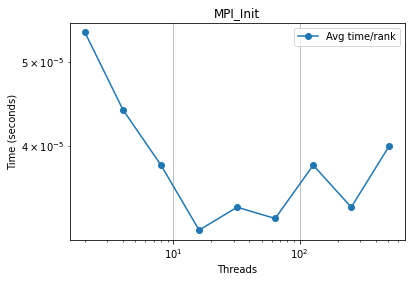

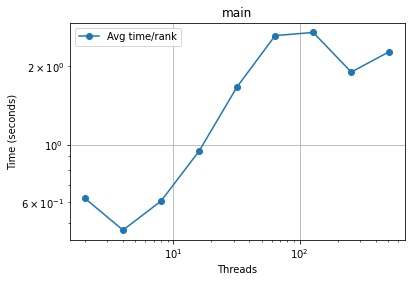

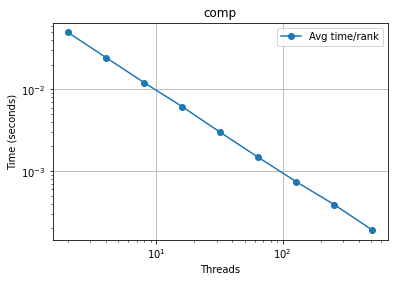

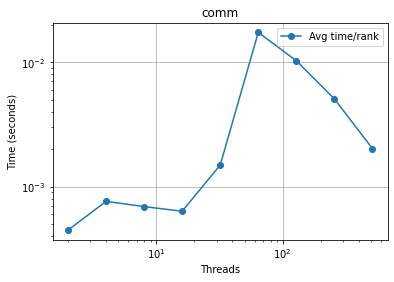

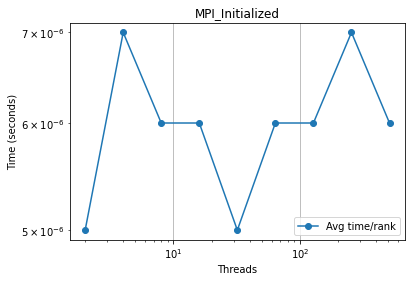

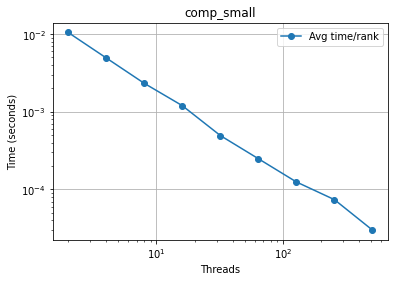

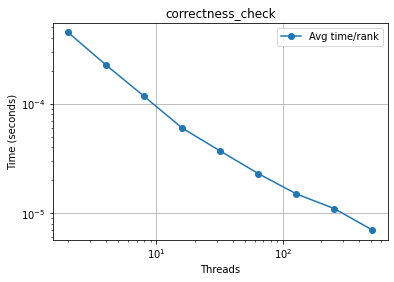

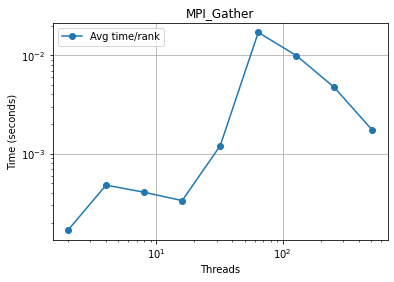

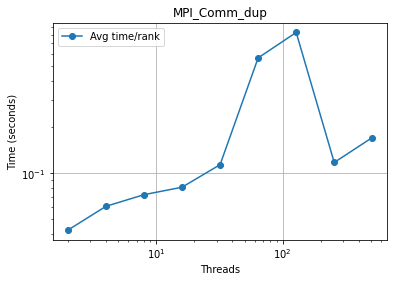

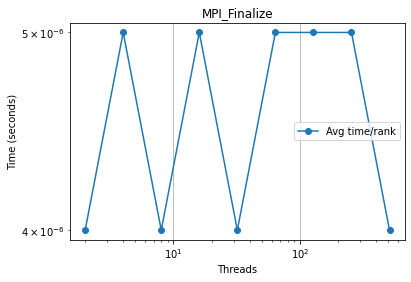

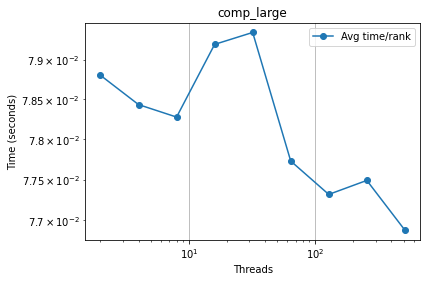

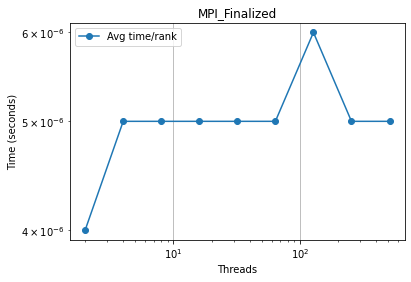

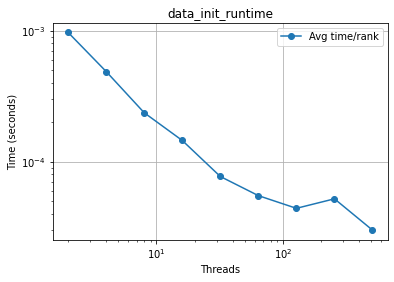

In [75]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,65536],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

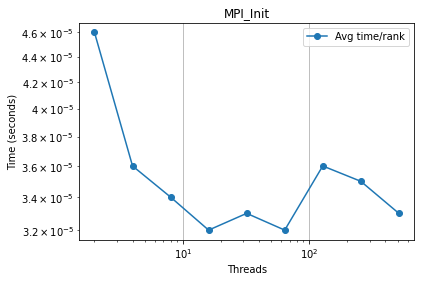

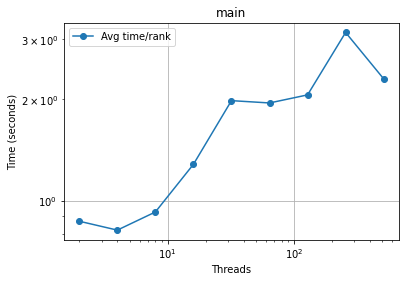

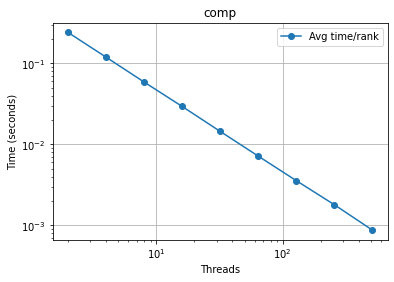

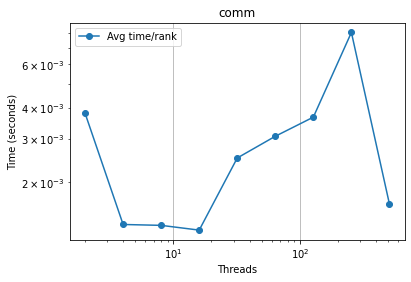

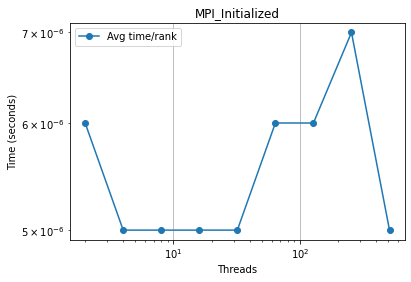

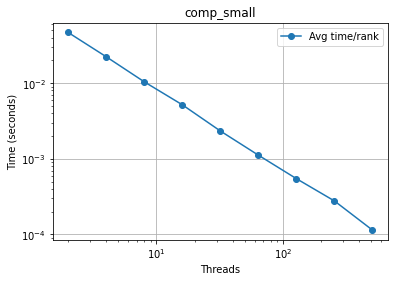

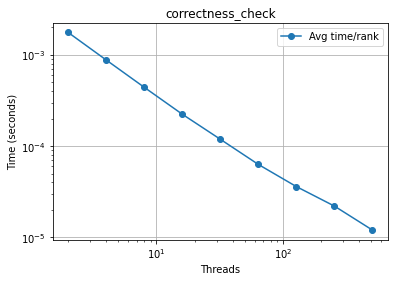

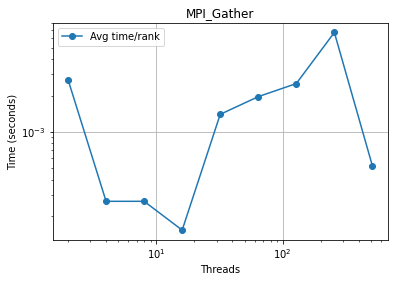

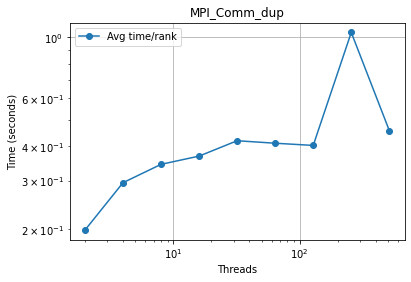

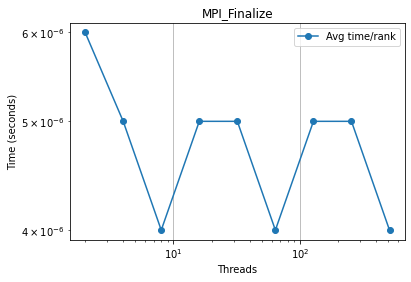

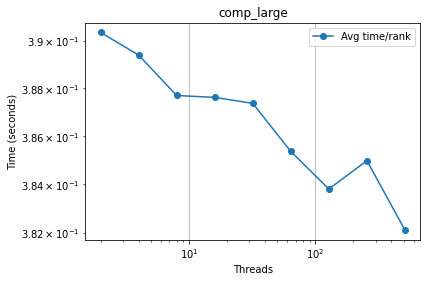

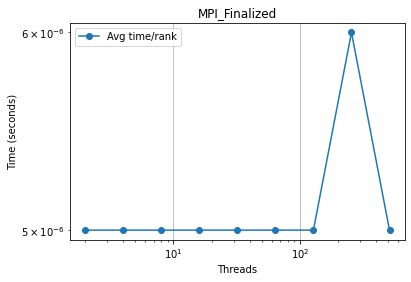

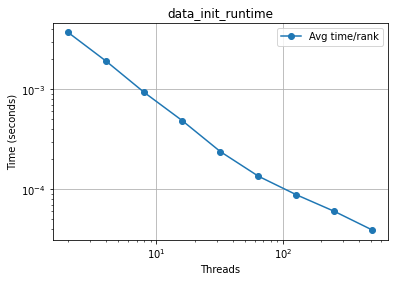

In [76]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,262144],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

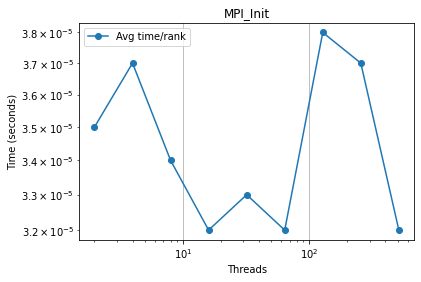

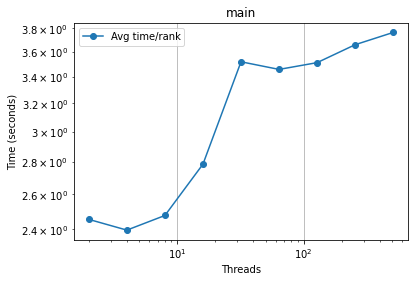

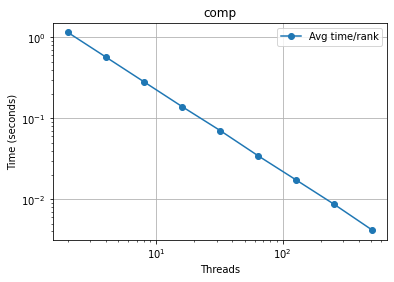

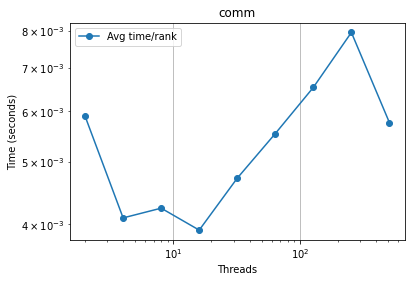

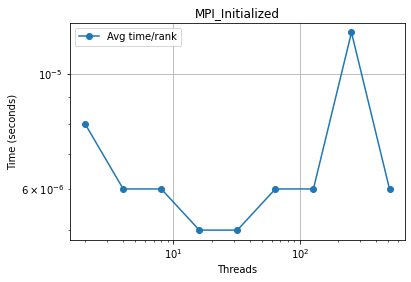

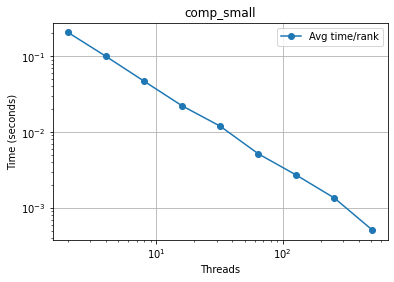

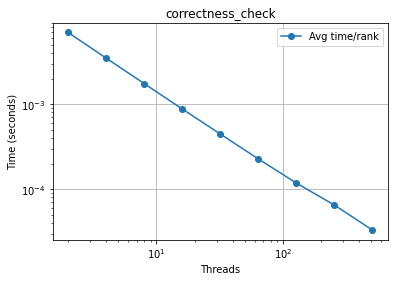

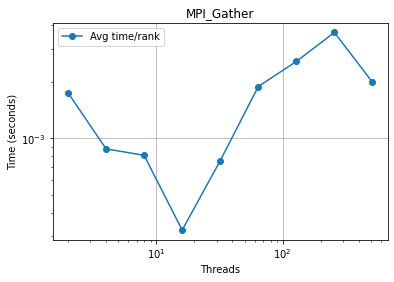

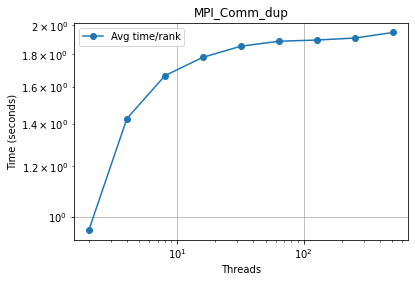

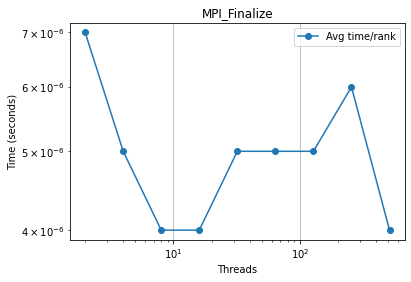

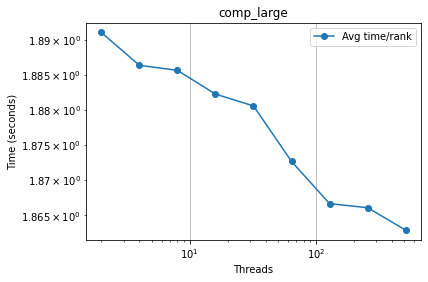

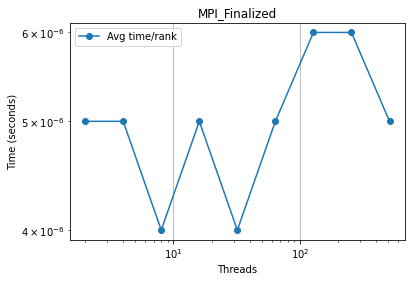

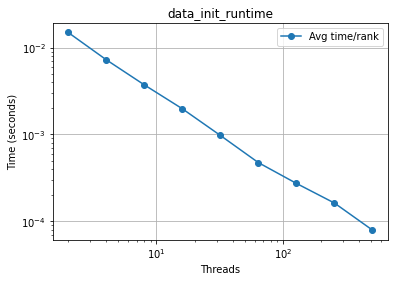

In [77]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,1048576],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

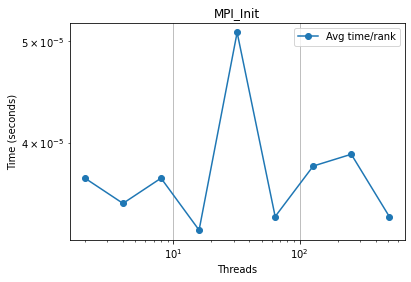

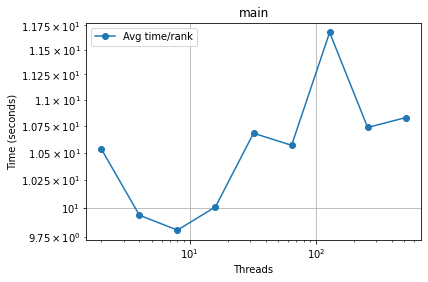

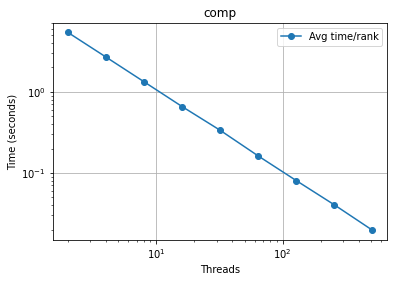

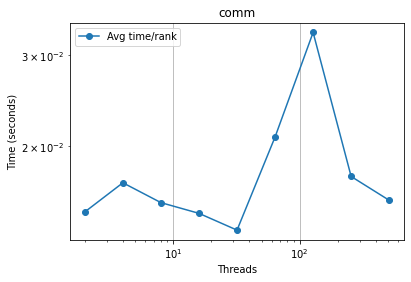

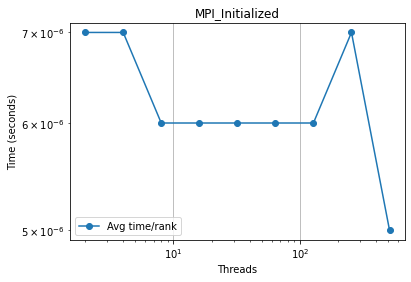

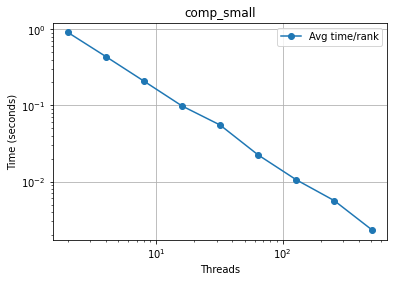

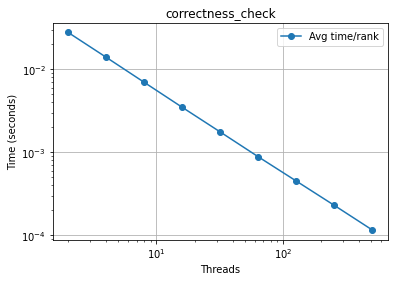

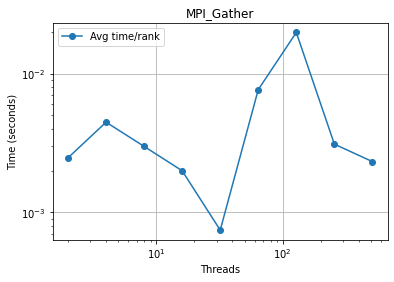

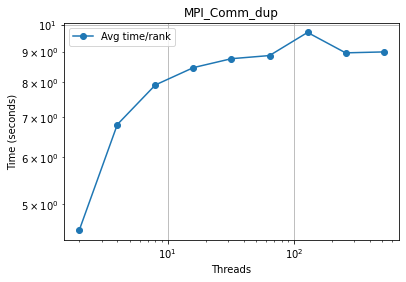

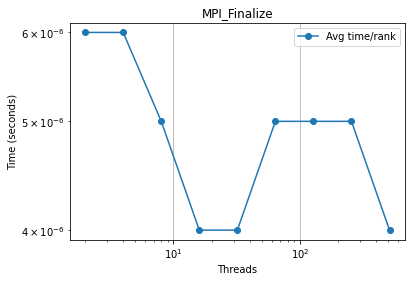

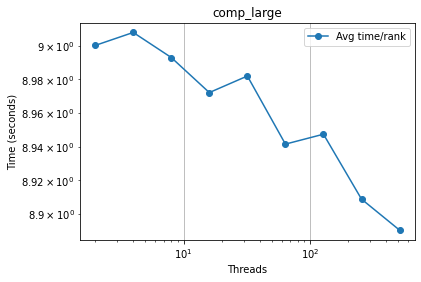

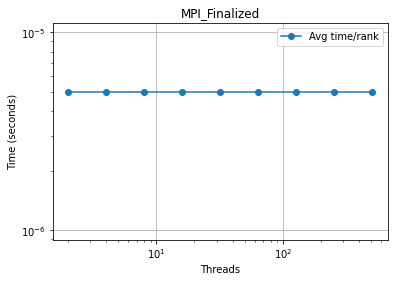

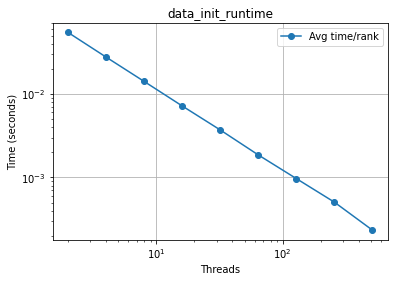

In [78]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,4194304],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

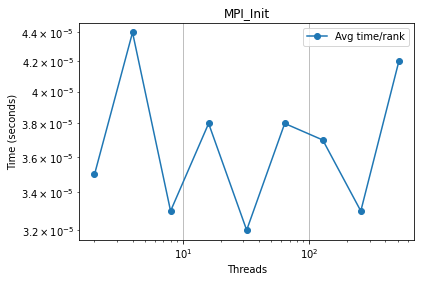

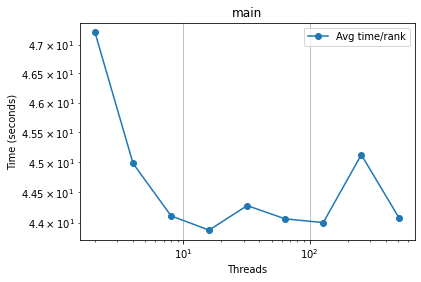

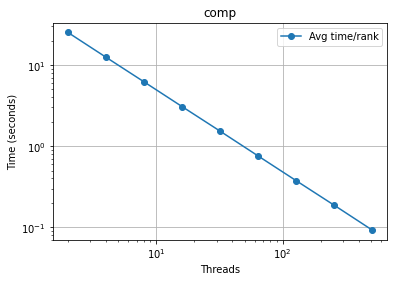

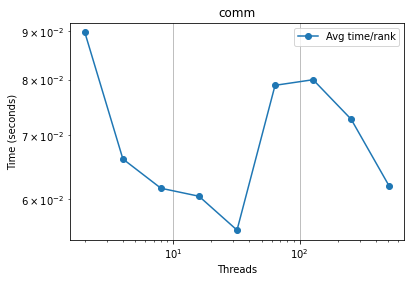

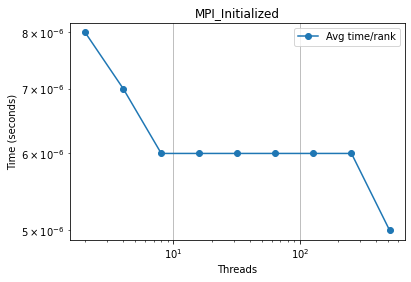

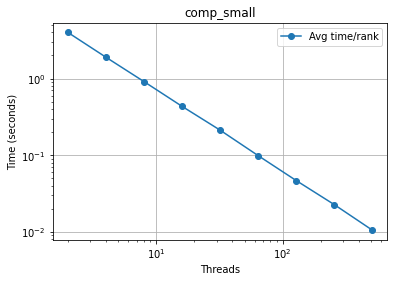

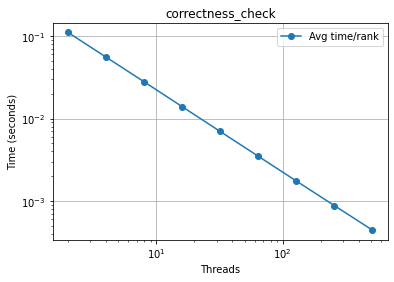

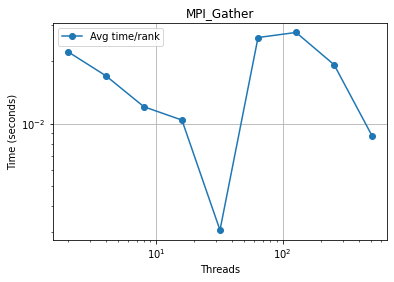

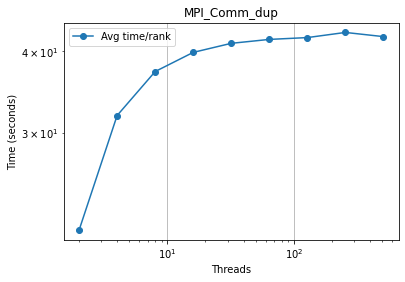

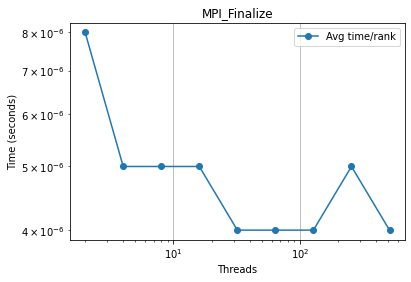

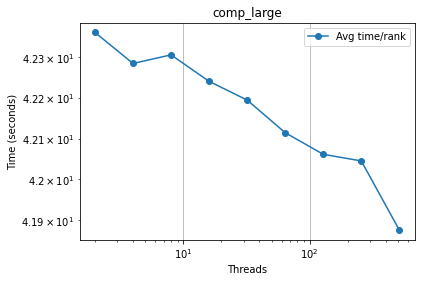

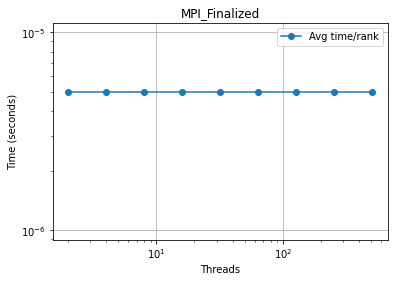

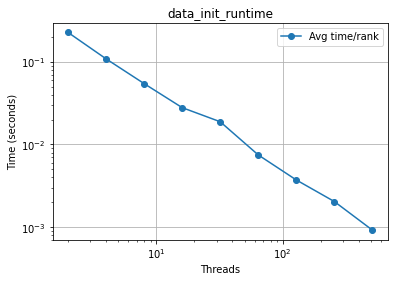

In [79]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,16777216],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

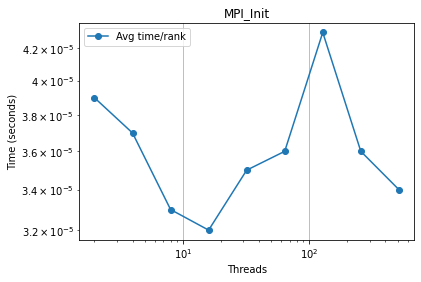

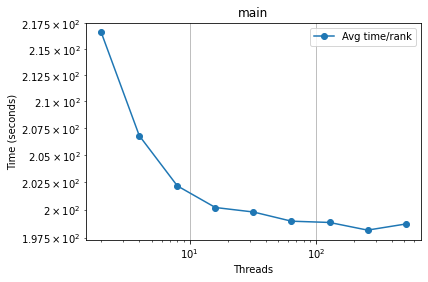

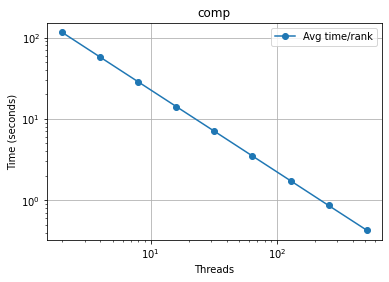

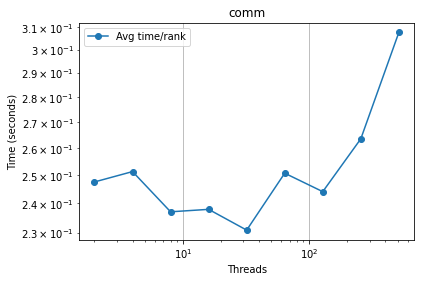

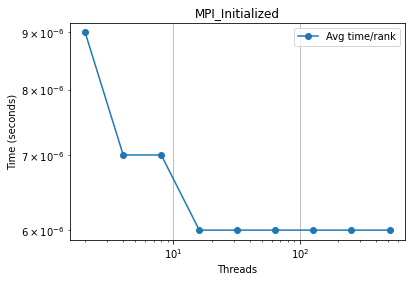

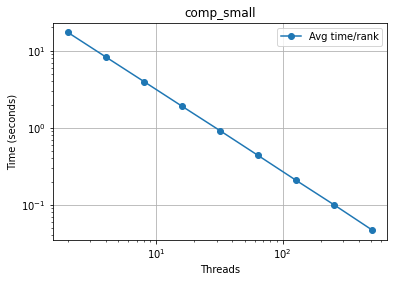

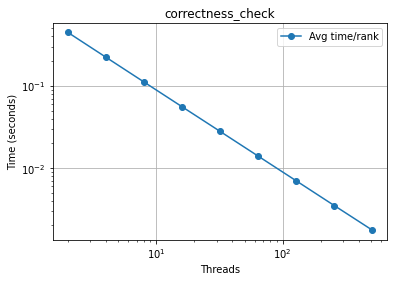

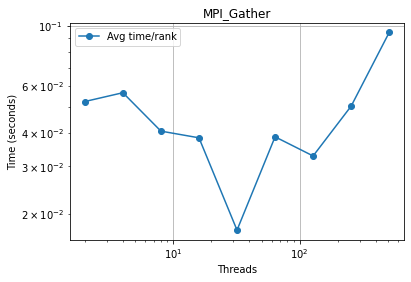

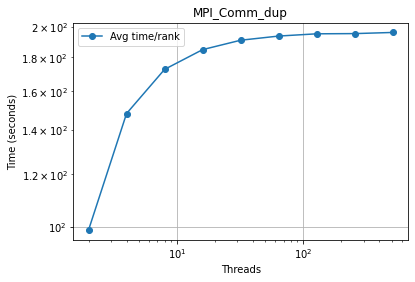

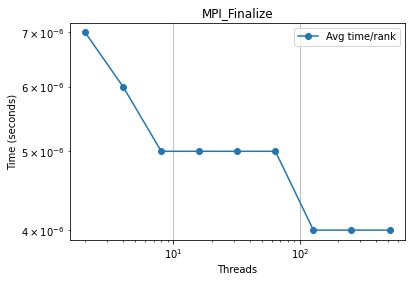

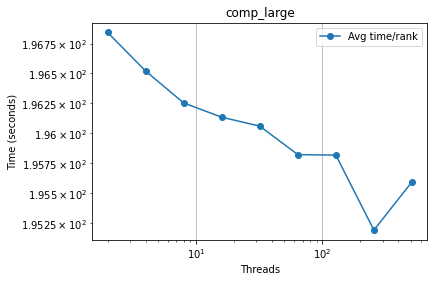

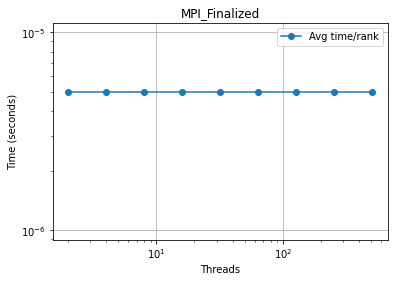

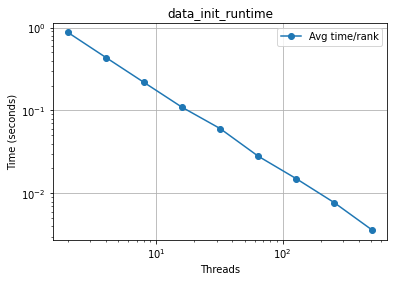

In [80]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name,67108864],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

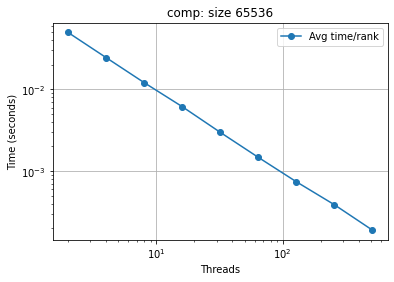

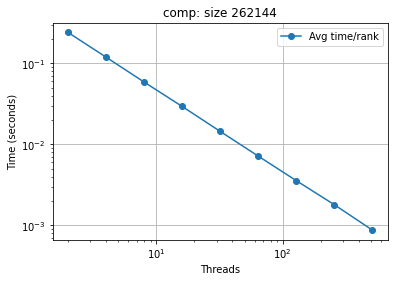

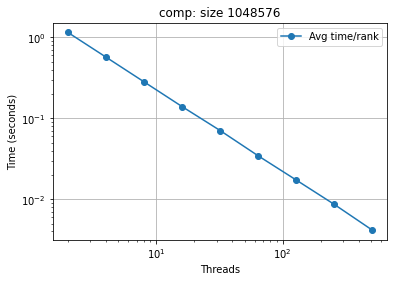

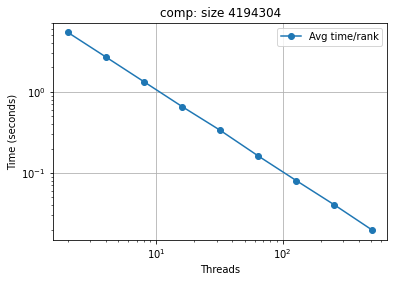

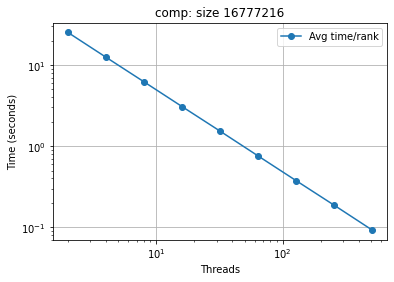

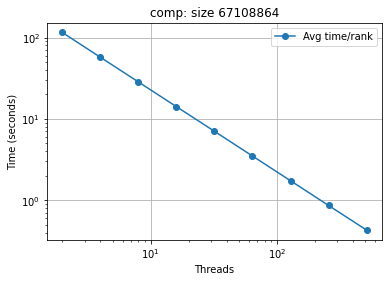

In [81]:
for sz in [65536, 262144,1048576,4194304,16777216,67108864]:
    plot_pandas(
        df=ctk.dataframe.loc["comp",sz],
        title="comp: size "+str(sz),
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

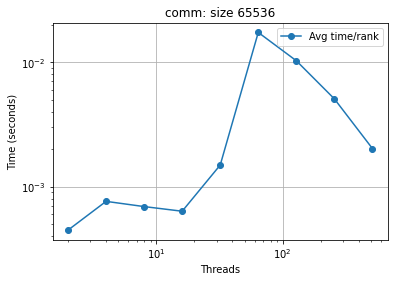

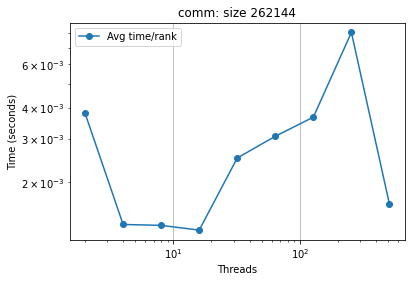

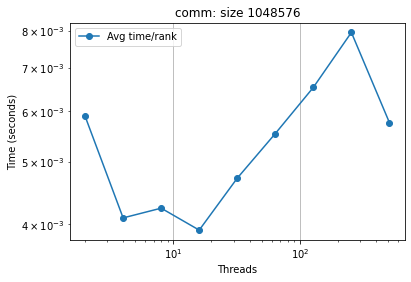

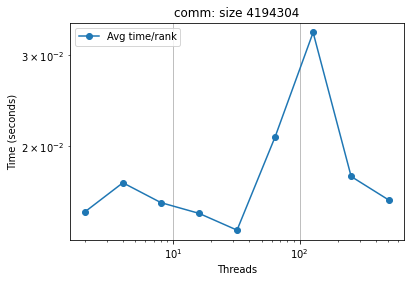

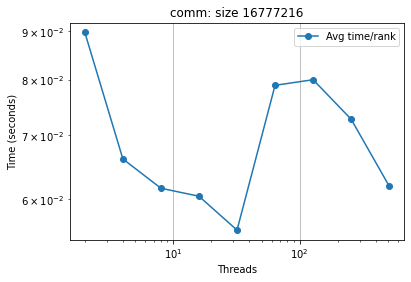

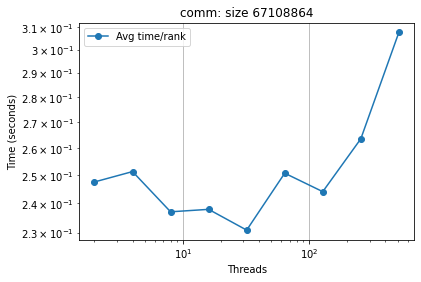

In [82]:
for sz in [65536, 262144,1048576,4194304,16777216,67108864]:
    plot_pandas(
        df=ctk.dataframe.loc["comm",sz],
        title="comm: size "+str(sz),
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

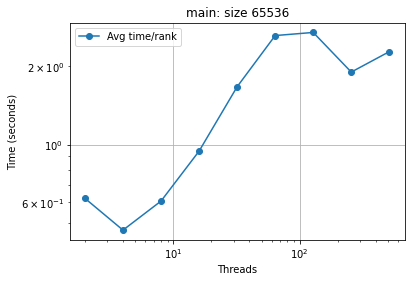

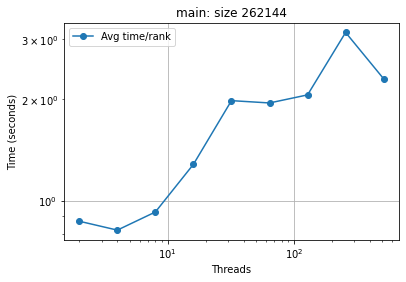

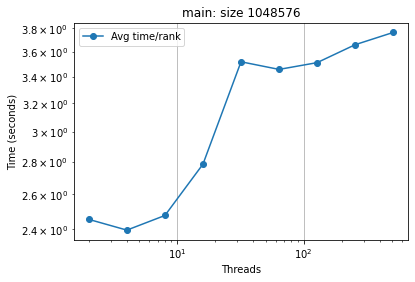

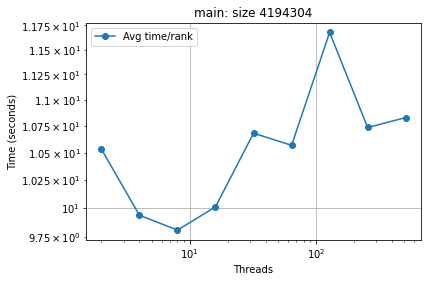

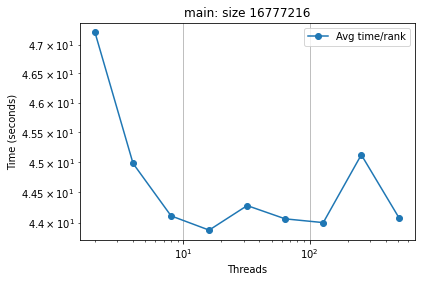

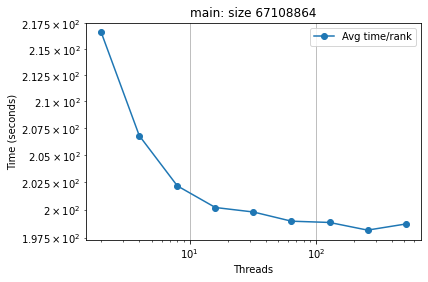

In [83]:
for sz in [65536, 262144,1048576,4194304,16777216,67108864]:
    plot_pandas(
        df=ctk.dataframe.loc["main",sz],
        title="main: size "+str(sz),
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

In [84]:
for sz in [65536, 262144,1048576,4194304,16777216,67108864]:
    plot_pandas(
        df=ctk.dataframe.loc["data_init",sz],
        title="data_init: size "+str(sz),
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

KeyError: 'data_init'

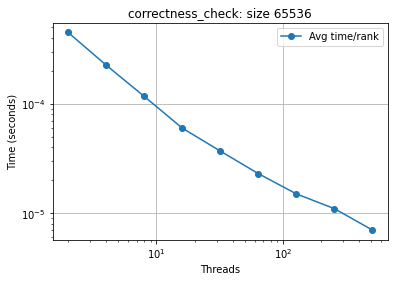

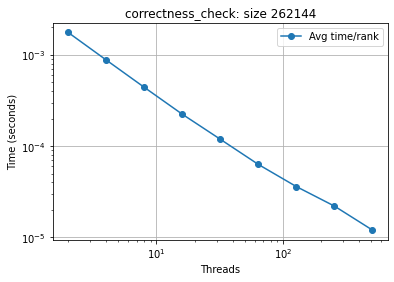

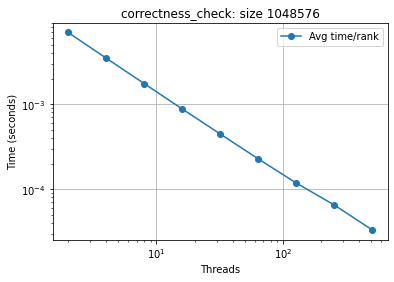

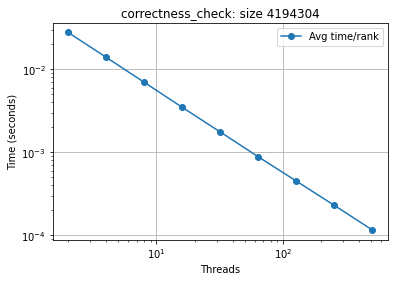

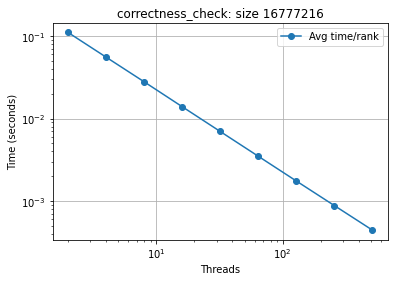

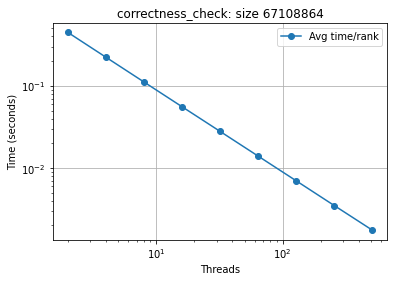

In [85]:
for sz in [65536, 262144,1048576,4194304,16777216,67108864]:
    plot_pandas(
        df=ctk.dataframe.loc["correctness_check",sz],
        title="correctness_check: size "+str(sz),
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

<Axes: title={'center': 'Strong Scaling'}, xlabel='Threads', ylabel='Time (seconds)'>

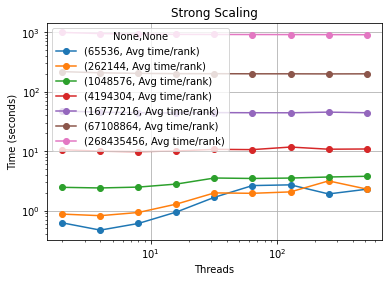

In [191]:
plot_pandas(
        df=ctk.dataframe.loc['main'],
        title='Strong Scaling',
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

<Axes: title={'center': 'Strong Scaling'}, xlabel='Processes', ylabel='Time (seconds)'>

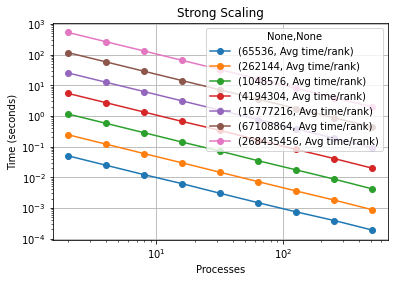

In [192]:
plot_pandas(
        df=ctk.dataframe.loc['comp'],
        title='Strong Scaling',
        xlabel="Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

<Axes: title={'center': 'Strong Scaling'}, xlabel='Processes', ylabel='Time (seconds)'>

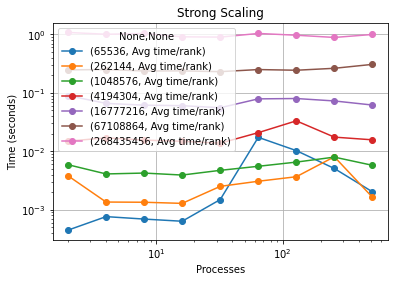

In [193]:
plot_pandas(
        df=ctk.dataframe.loc['comm'],
        title='Strong Scaling',
        xlabel="Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

In [89]:
plot_pandas(
        df=ctk.dataframe.loc['data_init'],
        title='Data Init',
        xlabel="Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

KeyError: 'data_init'

<Axes: title={'center': 'Corectness Check'}, xlabel='Processes', ylabel='Time (seconds)'>

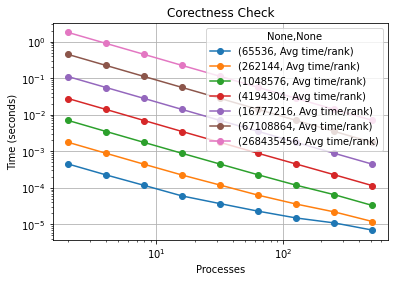

In [194]:
plot_pandas(
        df=ctk.dataframe.loc['correctness_check'],
        title='Corectness Check',
        xlabel="Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

<Axes: title={'center': 'Comp Large'}, xlabel='Processes', ylabel='Time (seconds)'>

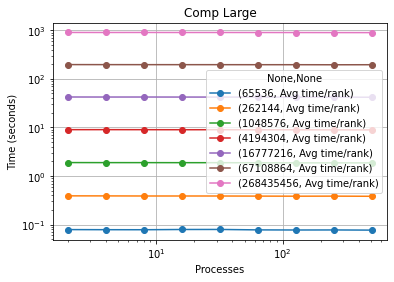

In [195]:
#MPI only
plot_pandas(
        df=ctk.dataframe.loc['comp_large'],
        title='Comp Large',
        xlabel="Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

In [196]:
plot_pandas(
        df=ctk.dataframe.loc['comm_large'],
        title='Comm Large',
        xlabel="Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

KeyError: 'comm_large'

[[2, 8, 32, 128, 512], [4, 16, 64, 256], [8, 32, 128, 512], [16, 64, 256], [32, 128, 512], [64, 256], [128, 512], [256], [512]]
[[1.0, 0.6695329865981828, 0.1762761335462531, 0.05314780685840488, 0.01407891054155826], [1.0, 0.36519584328793026, 0.1353565980151272, 0.04361377071646424], [1.0, 0.30627316907432917, 0.1724327078541662, 0.05593697665536656], [1.0, 0.48444423670668074, 0.2576831834814185], [1.0, 0.8112978396727373, 0.44329752029011726], [1.0, 0.8350131860546269], [1.0, 1.1771156636902038], [1.0], [1.0]]


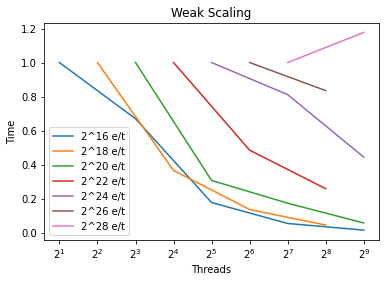

In [111]:
#MPI Only
thread_l=[]

time=[]
times=[]
l=[]
size=65536
threads=2
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][2]
while threads<=512:
    time.append(base/ctk.dataframe.loc['main',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
l.append(thread_l)
times.append(time)
time=[]
thread_l=[]
size=65536
threads=4
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][4]
while threads<=512:
    time.append(base/ctk.dataframe.loc['main',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=8
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][8]
while threads<=512:
    time.append(base/ctk.dataframe.loc['main',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=16
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][16]
while threads<=512:
    time.append(base/ctk.dataframe.loc['main',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=32
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][32]
while threads<=512:
    time.append(base/ctk.dataframe.loc['main',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=64
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][64]
while threads<=512:
    time.append(base/ctk.dataframe.loc['main',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=128
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][128]
while threads<=512:
    time.append(base/ctk.dataframe.loc['main',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=256
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][256]
while threads<=512:
    time.append(base/ctk.dataframe.loc['main',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=512
base=ctk.dataframe.loc['main',65536]['Avg time/rank'][512]
while threads<=512:
    time.append(base/ctk.dataframe.loc['main',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)

print(l)
print(times)
for i in range(len(times)):
    plt.plot(l[i],times[i])
plt.legend(["2^16 e/t", "2^18 e/t","2^20 e/t","2^22 e/t", "2^24 e/t", "2^26 e/t", "2^28 e/t"])
plt.xscale("log", base=2)
plt.xlabel("Threads")
plt.ylabel("Time")
plt.title("Weak Scaling")
plt.show()


[[2, 8, 32, 128, 512], [4, 16, 64, 256], [8, 32, 128, 512], [16, 64, 256], [32, 128, 512], [64, 256], [128, 512], [256], [512]]
[[1.0, 0.8475108666123337, 0.7059114693819828, 0.6201006273681595, 0.5406327509829194], [1.0, 0.8348857764481915, 0.7133437899384223, 0.6072497094676459], [1.0, 0.8388815835005883, 0.7009194471751576, 0.6159044715447155], [1.0, 0.8617795187465025, 0.7125506072874493], [1.0, 0.8396173325830051, 0.7183437650457392], [1.0, 0.8224455611390284], [1.0, 0.8515535097813579], [1.0], [1.0]]


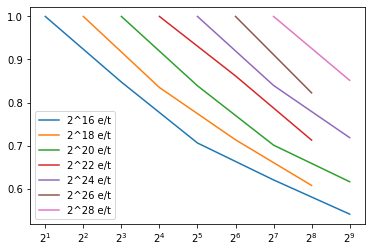

In [112]:
thread_l=[]

time=[]
times=[]
l=[]
size=65536
threads=2
base=ctk.dataframe.loc['comp',65536]['Avg time/rank'][2]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comp',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
l.append(thread_l)
times.append(time)
time=[]
thread_l=[]
size=65536
threads=4
base=ctk.dataframe.loc['comp',65536]['Avg time/rank'][4]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comp',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=8
base=ctk.dataframe.loc['comp',65536]['Avg time/rank'][8]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comp',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=16
base=ctk.dataframe.loc['comp',65536]['Avg time/rank'][16]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comp',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=32
base=ctk.dataframe.loc['comp',65536]['Avg time/rank'][32]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comp',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=64
base=ctk.dataframe.loc['comp',65536]['Avg time/rank'][64]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comp',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=128
base=ctk.dataframe.loc['comp',65536]['Avg time/rank'][128]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comp',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=256
base=ctk.dataframe.loc['comp',65536]['Avg time/rank'][256]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comp',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=512
base=ctk.dataframe.loc['comp',65536]['Avg time/rank'][512]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comp',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)

print(l)
print(times)
for i in range(len(times)):
    plt.plot(l[i],times[i])
plt.legend(["2^16 e/t", "2^18 e/t","2^20 e/t","2^22 e/t", "2^24 e/t", "2^26 e/t", "2^28 e/t"])
plt.xscale("log", base=2)
plt.show()

[[2, 8, 32, 128, 512], [4, 16, 64, 256], [8, 32, 128, 512], [16, 64, 256], [32, 128, 512], [64, 256], [128, 512], [256], [512]]
[[1.0, 0.33333333333333337, 0.0947435353963544, 0.013457369942196531, 0.007221091402539498], [1.0, 0.5931410756040529, 0.137513552584026, 0.04355540293040292], [1.0, 0.275518341307815, 0.10585171568627451, 0.04397912423625255], [1.0, 0.2065819485174324, 0.07978857286685125], [1.0, 0.4064375340971086, 0.2589052997393571], [1.0, 2.152594983858952], [1.0, 6.281957186544343], [1.0], [1.0]]


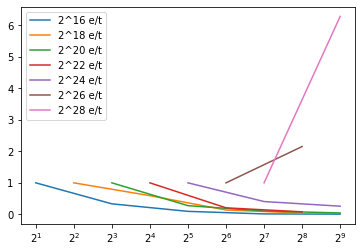

In [113]:
thread_l=[]

time=[]
times=[]
l=[]
size=65536
threads=2
base=ctk.dataframe.loc['comm',65536]['Avg time/rank'][2]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comm',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
l.append(thread_l)
times.append(time)
time=[]
thread_l=[]
size=65536
threads=4
base=ctk.dataframe.loc['comm',65536]['Avg time/rank'][4]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comm',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=8
base=ctk.dataframe.loc['comm',65536]['Avg time/rank'][8]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comm',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=16
base=ctk.dataframe.loc['comm',65536]['Avg time/rank'][16]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comm',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=32
base=ctk.dataframe.loc['comm',65536]['Avg time/rank'][32]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comm',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=64
base=ctk.dataframe.loc['comm',65536]['Avg time/rank'][64]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comm',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=128
base=ctk.dataframe.loc['comm',65536]['Avg time/rank'][128]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comm',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=256
base=ctk.dataframe.loc['comm',65536]['Avg time/rank'][256]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comm',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)
time=[]
thread_l=[]
size=65536
threads=512
base=ctk.dataframe.loc['comm',65536]['Avg time/rank'][512]
while threads<=512:
    time.append(base/ctk.dataframe.loc['comm',size]['Avg time/rank'][threads])
    thread_l.append(threads)
    threads*=4
    size*=4
times.append(time)
l.append(thread_l)

print(l)
print(times)
for i in range(len(times)):
    plt.plot(l[i],times[i])
plt.legend(["2^16 e/t", "2^18 e/t","2^20 e/t","2^22 e/t", "2^24 e/t", "2^26 e/t", "2^28 e/t"])
plt.xscale("log", base=2)
plt.show()